In [1]:
%matplotlib notebook


In [2]:
# Numpy
import numpy as np

# Branched Bifluxon
# import three_J_bifluxon as bf3J
# import branched_bifluxon_L as bbfL
#import New_BF3J as bf3J
from qutip import *
from importlib import reload

# Matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, Image, Markdown
from scipy.interpolate import interp1d
from scipy import interpolate
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm



# Warnings
import warnings, matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
def find_nearest(array, value): # https://stackoverflow.com/questions/2566412/find-nearest-value-in-numpy-array
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]
def pcolor(x,y,z, size=(5,4)):
    f = plt.figure(figsize=size)
    ax = f.add_subplot(111)
    x1, y1 = np.meshgrid(x,y)
    #mesh = ax.pcolormesh(y1, x1 ,z, norm=colors.LogNorm())
    im = mesh = ax.pcolormesh(y1,x1,z)
    f.colorbar(im, ax=ax)
    return ax, mesh

################################################################################################
## Open a txt file, turn it into a dictionary. The dictionary has n1, n2, and E01 ##
################################################################################################
def open_and_extract_txt_E01(txtfile='', xname='', yname='', zname='', size=None):
    file = open(txtfile, "r")
    a = file.read().split('\n')
    del(a[-1])
    print('# of entries in .txt: ' + str(len(a)))
    file.close()
    x = []
    y = []
    e01 = []
    for i in range(len(a)):
        if i%3==0:
            x.append(float(a[i]))
        if i%3==1:
            y.append(float(a[i]))
    x = np.unique(np.asarray(x))
    y = np.unique(np.asarray(y))
    for i in range(len(a)):
        if i%3==2:
            e01.append(float(a[i]))
    e01 = np.reshape(e01,(size,size))
    print('Size of ' + str(xname) + ': ' + str(np.shape(x)))
    print('Size of ' + str(yname) + ': ' + str(np.shape(y)))
    print('Size of ' + str(zname) + ': ' + str(np.shape(e01)))
    return {'x': x, 'y': y, 'z': e01}



################################################################################################
## Open a txt file, turn it into a dictionary. The dictionary has n1, n2, E0, and E1 ###########
################################################################################################
def open_and_extract_txt_E0E1(txtfile='', xname='', yname='', z1name='', z2name='', size=None):
    file = open(txtfile, "r")
    a = file.read().split('\n')
    del(a[-1])
    print('# of entries in .txt: ' + str(len(a)))
    file.close()
    x = []
    y = []
    e0 = []
    e1 = []
    for i in range(len(a)):
        if i%4==0:
            x.append(float(a[i]))
        if i%4==1:
            y.append(float(a[i]))
    x = np.unique(np.asarray(x))
    y = np.unique(np.asarray(y))
    for i in range(len(a)):
        if i%4==2:
            e0.append(float(a[i]))
    for i in range(len(a)):
        if i%4==3:
            e1.append(float(a[i]))
    e0 = np.reshape(e0,(size,size))
    e1 = np.reshape(e1,(size,size))
    print('Size of ' + str(xname) + ': ' + str(np.shape(x)))
    print('Size of ' + str(yname) + ': ' + str(np.shape(y)))
    print('Size of ' + str(z1name) + ': ' + str(np.shape(e0)))
    print('Size of ' + str(z2name) + ': ' + str(np.shape(e1)))

    return {'x': x, 'y': y, 'z1': e0, 'z2': e1}

# Start Importing & Plotting 

# of entries in .txt: 10000
Size of n1: (50,)
Size of n2: (50,)
Size of e0: (50, 50)
Size of e1: (50, 50)


<IPython.core.display.Javascript object>


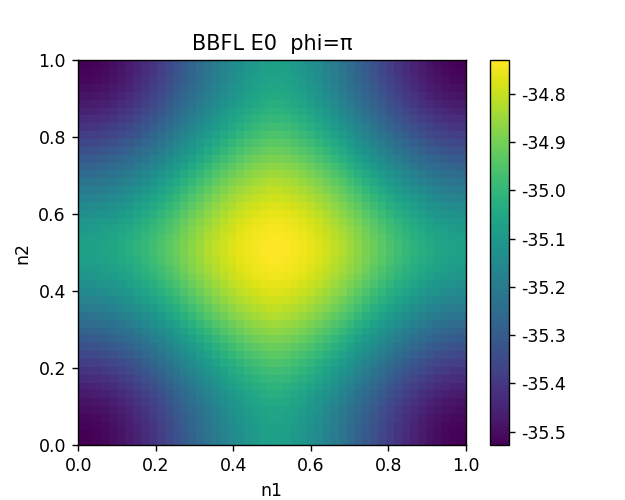

Text(0.5, 1.0, 'BBFL E0  phi=π')

In [4]:
## Define the dictionary with n1, n2, E0, and E1 
A = open_and_extract_txt_E0E1("BBFL_n1n2E0E1_0150_eigen_pi_cluster.txt",xname='n1', yname='n2', z1name='e0',z2name='e1', size=50)

## Make a pretty plot
axs, meshs = pcolor(A['x'],A['y'], A['z1'])
axs.set_xlabel('n1')
axs.set_ylabel('n2')
#axs.set_yticks([0., .5*np.pi, np.pi, 1.5*np.pi])
#axs.set_yticklabels(["$0$", r"$\frac{\pi}{2}$",
#                 r"$\pi$", r"$\frac{3\pi}{2}$"])
axs.set_title('BBFL E0  phi=π')

In [5]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

<IPython.core.display.Javascript object>


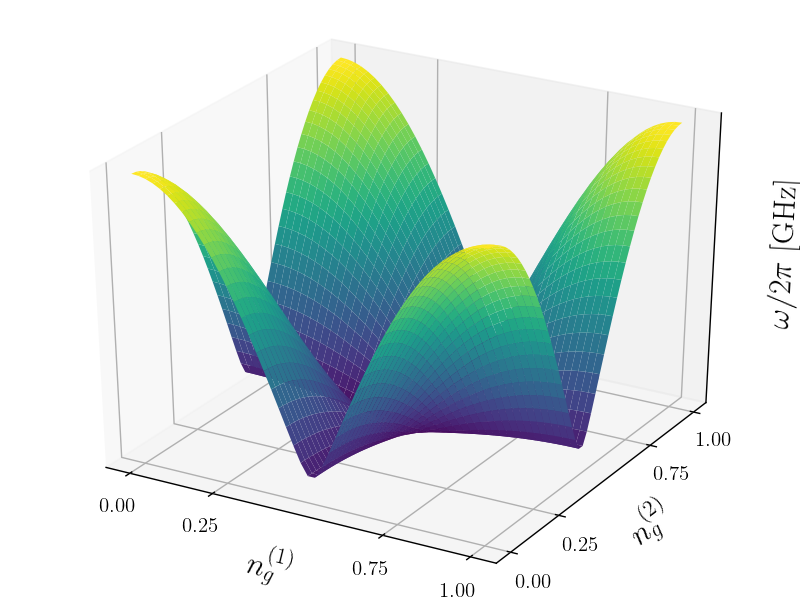

In [8]:
x = A['x']
y = A['y']
X, Y = np.meshgrid(x, y)

## Make a prettier plot
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, A['z2']-A['z1'], rstride=1, cstride=1, cmap=cm.viridis)
#ax.plot_surface(X, Y, A['z2'], rstride=1, cstride=1, cmap=cm.viridis)
ax.set_xlabel(r'$n_g^{(1)}$', fontsize = 18)
ax.set_ylabel(r'$n_g^{(2)}$', fontsize = 18)
# ax.set_title('BBFL - E01')

ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.tick_params(axis="z", labelsize=12)

ax.set_xticks([0., 0.25,   0.75, 1])
ax.set_yticks([0., 0.25,   0.75, 1])
ax.set_zticks([])

ax.set_zlabel(r'$\omega/2\pi$ [GHz]', fontsize = 18)
plt.show()

In [11]:
spec = A['z2']-A['z1']

diag = [spec[i][i] for i in range(len(x))]


<IPython.core.display.Javascript object>


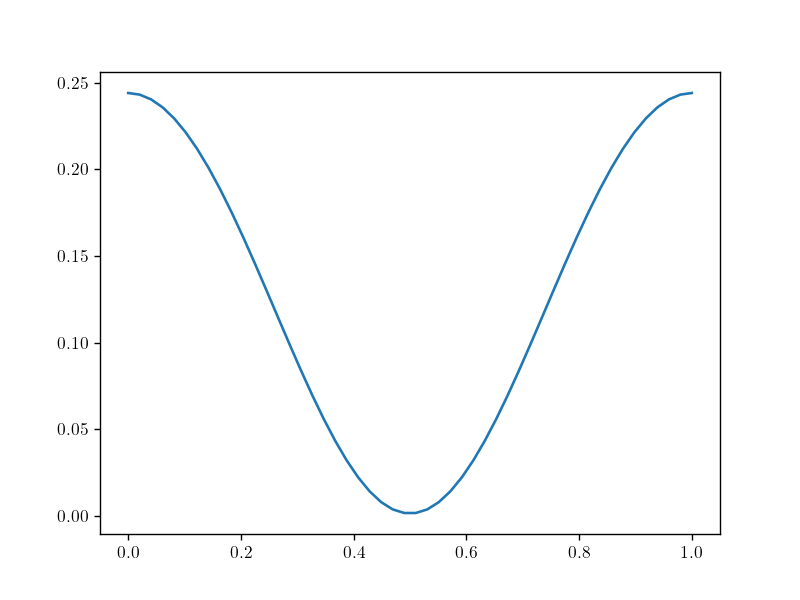

In [12]:
fig, ax = plt.subplots()
ax.plot(x, diag)